
.. redirect-from:: /gallery/userdemo/anchored_box04
.. redirect-from:: /gallery/userdemo/annotate_explain
.. redirect-from:: /gallery/userdemo/annotate_simple01
.. redirect-from:: /gallery/userdemo/annotate_simple02
.. redirect-from:: /gallery/userdemo/annotate_simple03
.. redirect-from:: /gallery/userdemo/annotate_simple04
.. redirect-from:: /gallery/userdemo/annotate_simple_coord01
.. redirect-from:: /gallery/userdemo/annotate_simple_coord02
.. redirect-from:: /gallery/userdemo/annotate_simple_coord03
.. redirect-from:: /gallery/userdemo/annotate_text_arrow
.. redirect-from:: /gallery/userdemo/connect_simple01
.. redirect-from:: /gallery/userdemo/connectionstyle_demo
.. redirect-from:: /tutorials/text/annotations


# Annotations

Annotations are graphical elements, often pieces of text, that explain, add
context to, or otherwise highlight some portion of the visualized data.
`~.Axes.annotate` supports a number of coordinate systems for flexibly
positioning data and annotations relative to each other and a variety of
options of for styling the text. Axes.annotate also provides an optional arrow
from the text to the data and this arrow can be styled in various ways.
`~.Axes.text` can also be used for simple text annotation, but does not
provide as much flexibility in positioning and styling as `~.Axes.annotate`.
   :depth: 3



## Basic annotation

In an annotation, there are two points to consider: the location of the data
being annotated *xy* and the location of the annotation text *xytext*.  Both
of these arguments are ``(x, y)`` tuples:



(-2.0, 2.0)

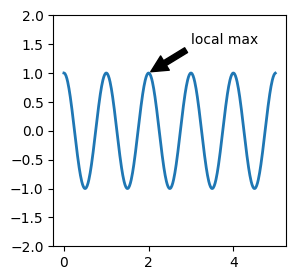

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylim(-2, 2)

In this example, both the *xy* (arrow tip) and *xytext* locations
(text location) are in data coordinates.  There are a variety of other
coordinate systems one can choose -- you can specify the coordinate
system of *xy* and *xytext* with one of the following strings for
*xycoords* and *textcoords* (default is 'data')

==================  ========================================================
argument            coordinate system
==================  ========================================================
'figure points'     points from the lower left corner of the figure
'figure pixels'     pixels from the lower left corner of the figure
'figure fraction'   (0, 0) is lower left of figure and (1, 1) is upper right
'axes points'       points from lower left corner of the Axes
'axes pixels'       pixels from lower left corner of the Axes
'axes fraction'     (0, 0) is lower left of Axes and (1, 1) is upper right
'data'              use the axes data coordinate system
==================  ========================================================

The following strings are also valid arguments for *textcoords*

==================  ========================================================
argument            coordinate system
==================  ========================================================
'offset points'     offset (in points) from the xy value
'offset pixels'     offset (in pixels) from the xy value
==================  ========================================================

For physical coordinate systems (points or pixels) the origin is the
bottom-left of the figure or Axes. Points are
[typographic points](https://en.wikipedia.org/wiki/Point_(typography))
meaning that they are a physical unit measuring 1/72 of an inch. Points and
pixels are discussed in further detail in `transforms-fig-scale-dpi`.


### Annotating data

This example places the text coordinates in fractional axes coordinates:



(-2.0, 2.0)

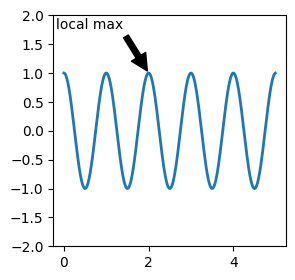

In [2]:
fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xycoords='data',
            xytext=(0.01, .99), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylim(-2, 2)

### Annotating an Artist

Annotations can be positioned relative to an `.Artist` instance by passing
that Artist in as *xycoords*. Then *xy* is interpreted as a fraction of the
Artist's bounding box.



[(1.0, 2.0), (1.0, 2.0)]

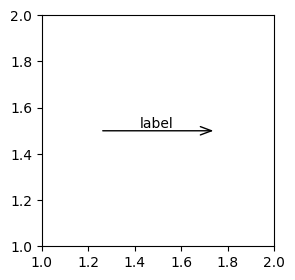

In [3]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(3, 3))
arr = mpatches.FancyArrowPatch((1.25, 1.5), (1.75, 1.5),
                               arrowstyle='->,head_width=.15', mutation_scale=20)
ax.add_patch(arr)
ax.annotate("label", (.5, .5), xycoords=arr, ha='center', va='bottom')
ax.set(xlim=(1, 2), ylim=(1, 2))

Here the annotation is placed at position (.5,.5) relative to the arrow's
lower left corner and is vertically and horizontally at that position.
Vertically, the bottom aligns to that reference point so that the label
is above the line. For an example of chaining annotation Artists, see the
`Artist section <artist_annotation_coord>` of
`annotating_coordinate_systems`.



### Annotating with arrows

You can enable drawing of an arrow from the text to the annotated point
by giving a dictionary of arrow properties in the optional keyword
argument *arrowprops*.

==================== =====================================================
*arrowprops* key     description
==================== =====================================================
width                the width of the arrow in points
frac                 the fraction of the arrow length occupied by the head
headwidth            the width of the base of the arrow head in points
shrink               move the tip and base some percent away from
                     the annotated point and text

\*\*kwargs           any key for :class:`matplotlib.patches.Polygon`,
                     e.g., ``facecolor``
==================== =====================================================

In the example below, the *xy* point is in the data coordinate system
since *xycoords* defaults to 'data'. For a polar Axes, this is in
(theta, radius) space. The text in this example is placed in the
fractional figure coordinate system. :class:`matplotlib.text.Text`
keyword arguments like *horizontalalignment*, *verticalalignment* and
*fontsize* are passed from `~matplotlib.axes.Axes.annotate` to the
``Text`` instance.



Text(0.05, 0.05, 'a polar annotation')

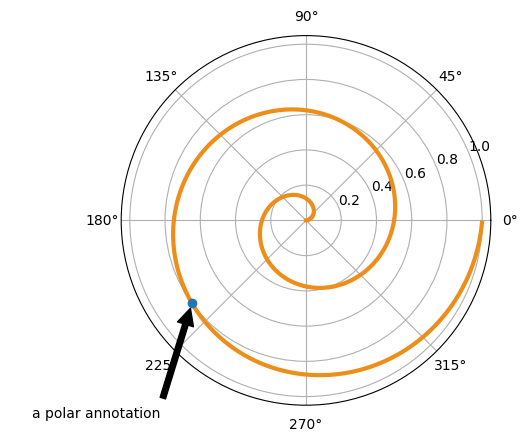

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

For more on plotting with arrows, see `annotation_with_custom_arrow`


### Placing text annotations relative to data

Annotations can be positioned at a relative offset to the *xy* input to
annotation by setting the *textcoords* keyword argument to ``'offset points'``
or ``'offset pixels'``.



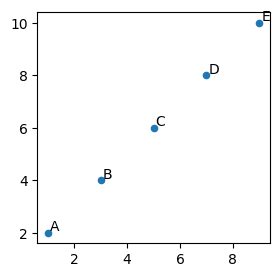

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))
x = [1, 3, 5, 7, 9]
y = [2, 4, 6, 8, 10]
annotations = ["A", "B", "C", "D", "E"]
ax.scatter(x, y, s=20)

for xi, yi, text in zip(x, y, annotations):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

The annotations are offset 1.5 points (1.5*1/72 inches) from the *xy* values.


## Advanced annotation

We recommend reading `annotations-tutorial`, :func:`~matplotlib.pyplot.text`
and :func:`~matplotlib.pyplot.annotate` before reading this section.

### Annotating with boxed text

`~.Axes.text` takes a *bbox* keyword argument, which draws a box around the
text:



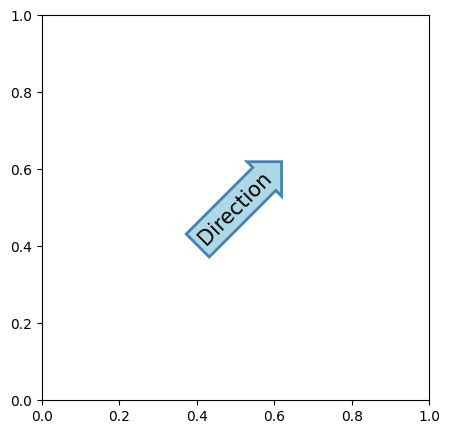

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
t = ax.text(0.5, 0.5, "Direction",
            ha="center", va="center", rotation=45, size=15,
            bbox=dict(boxstyle="rarrow,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))

The arguments are the name of the box style with its attributes as
keyword arguments. Currently, following box styles are implemented:

==========   ==============   ==========================
Class        Name             Attrs
==========   ==============   ==========================
Circle       ``circle``       pad=0.3
DArrow       ``darrow``       pad=0.3
Ellipse      ``ellipse``      pad=0.3
LArrow       ``larrow``       pad=0.3
RArrow       ``rarrow``       pad=0.3
Round        ``round``        pad=0.3,rounding_size=None
Round4       ``round4``       pad=0.3,rounding_size=None
Roundtooth   ``roundtooth``   pad=0.3,tooth_size=None
Sawtooth     ``sawtooth``     pad=0.3,tooth_size=None
Square       ``square``       pad=0.3
==========   ==============   ==========================

.. figure:: /gallery/shapes_and_collections/images/sphx_glr_fancybox_demo_001.png
   :target: /gallery/shapes_and_collections/fancybox_demo.html
   :align: center

The patch object (box) associated with the text can be accessed using::

    bb = t.get_bbox_patch()

The return value is a `.FancyBboxPatch`; patch properties
(facecolor, edgewidth, etc.) can be accessed and modified as usual.
`.FancyBboxPatch.set_boxstyle` sets the box shape::

   bb.set_boxstyle("rarrow", pad=0.6)

The attribute arguments can also be specified within the style
name with separating comma::

   bb.set_boxstyle("rarrow, pad=0.6")


### Defining custom box styles

Custom box styles can be implemented as a function that takes arguments specifying
both a rectangular box and the amount of "mutation", and returns the "mutated" path.
The specific signature is the one of ``custom_box_style`` below.

Here, we return a new path which adds an "arrow" shape on the left of the box.

The custom box style can then be used by passing
``bbox=dict(boxstyle=custom_box_style, ...)`` to `.Axes.text`.



Text(0.5, 0.5, 'Test')

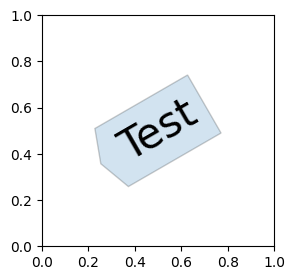

In [7]:
from matplotlib.path import Path


def custom_box_style(x0, y0, width, height, mutation_size):
    """
    Given the location and size of the box, return the path of the box around it.

    Rotation is automatically taken care of.

    Parameters
    ----------
    x0, y0, width, height : float
       Box location and size.
    mutation_size : float
        Mutation reference scale, typically the text font size.
    """
    # padding
    mypad = 0.3
    pad = mutation_size * mypad
    # width and height with padding added.
    width = width + 2 * pad
    height = height + 2 * pad
    # boundary of the padded box
    x0, y0 = x0 - pad, y0 - pad
    x1, y1 = x0 + width, y0 + height
    # return the new path
    return Path([(x0, y0), (x1, y0), (x1, y1), (x0, y1),
                 (x0-pad, (y0+y1)/2), (x0, y0), (x0, y0)],
                closed=True)

fig, ax = plt.subplots(figsize=(3, 3))
ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center", rotation=30,
        bbox=dict(boxstyle=custom_box_style, alpha=0.2))

Likewise, custom box styles can be implemented as classes that implement
``__call__``.

The classes can then be registered into the ``BoxStyle._style_list`` dict,
which allows specifying the box style as a string,
``bbox=dict(boxstyle="registered_name,param=value,...", ...)``.
Note that this registration relies on internal APIs and is therefore not
officially supported.



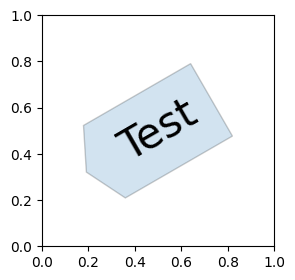

In [8]:
from matplotlib.patches import BoxStyle


class MyStyle:
    """A simple box."""

    def __init__(self, pad=0.3):
        """
        The arguments must be floats and have default values.

        Parameters
        ----------
        pad : float
            amount of padding
        """
        self.pad = pad
        super().__init__()

    def __call__(self, x0, y0, width, height, mutation_size):
        """
        Given the location and size of the box, return the path of the box around it.

        Rotation is automatically taken care of.

        Parameters
        ----------
        x0, y0, width, height : float
            Box location and size.
        mutation_size : float
            Reference scale for the mutation, typically the text font size.
        """
        # padding
        pad = mutation_size * self.pad
        # width and height with padding added
        width = width + 2 * pad
        height = height + 2 * pad
        # boundary of the padded box
        x0, y0 = x0 - pad, y0 - pad
        x1, y1 = x0 + width, y0 + height
        # return the new path
        return Path([(x0, y0), (x1, y0), (x1, y1), (x0, y1),
                     (x0-pad, (y0+y1)/2), (x0, y0), (x0, y0)],
                    closed=True)


BoxStyle._style_list["angled"] = MyStyle  # Register the custom style.

fig, ax = plt.subplots(figsize=(3, 3))
ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center", rotation=30,
        bbox=dict(boxstyle="angled,pad=0.5", alpha=0.2))

del BoxStyle._style_list["angled"]  # Unregister it.

Similarly, you can define a custom `.ConnectionStyle` and a custom `.ArrowStyle`. View
the source code at `.patches` to learn how each class is defined.


### Customizing annotation arrows

An arrow connecting *xy* to *xytext* can be optionally drawn by
specifying the *arrowprops* argument. To draw only an arrow, use
empty string as the first argument:



Text(0.8, 0.8, '')

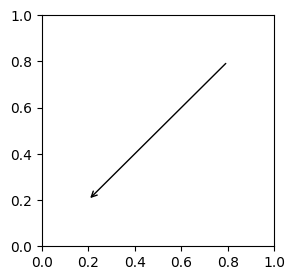

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

The arrow is drawn as follows:

1. A path connecting the two points is created, as specified by the
   *connectionstyle* parameter.
2. The path is clipped to avoid patches *patchA* and *patchB*, if these are
   set.
3. The path is further shrunk by *shrinkA* and *shrinkB* (in pixels).
4. The path is transmuted to an arrow patch, as specified by the *arrowstyle*
   parameter.

.. plot::
    :show-source-link: False

    import matplotlib.patches as mpatches

    x1, y1 = 0.3, 0.3
    x2, y2 = 0.7, 0.7
    arrowprops = {
        "1. connect with connectionstyle":
            dict(arrowstyle="-", patchB=False, shrinkB=0),
        "2. clip against patchB": dict(arrowstyle="-", patchB=True, shrinkB=0),
        "3. shrink by shrinkB": dict(arrowstyle="-", patchB=True, shrinkB=5),
        "4. mutate with arrowstyle": dict(arrowstyle="fancy", patchB=True, shrinkB=5),
    }

    fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='compressed')
    for ax, (name, props) in zip(axs.flat, arrowprops.items()):
        ax.plot([x1, x2], [y1, y2], ".")

        el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
        ax.add_artist(el)

        props["patchB"] = el if props["patchB"] else None

        ax.annotate(
            "",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops={"color": "0.5", "connectionstyle": "arc3,rad=0.3", **props})
        ax.text(.05, .95, name, transform=ax.transAxes, ha="left", va="top")

        ax.set(xlim=(0, 1), ylim=(0, 1), xticks=[], yticks=[], aspect=1)

    fig.get_layout_engine().set(wspace=0, hspace=0, w_pad=0, h_pad=0)

The creation of the connecting path between two points is controlled by
``connectionstyle`` key and the following styles are available:

==========   =============================================
Name         Attrs
==========   =============================================
``angle``    angleA=90,angleB=0,rad=0.0
``angle3``   angleA=90,angleB=0
``arc``      angleA=0,angleB=0,armA=None,armB=None,rad=0.0
``arc3``     rad=0.0
``bar``      armA=0.0,armB=0.0,fraction=0.3,angle=None
==========   =============================================

Note that "3" in ``angle3`` and ``arc3`` is meant to indicate that the
resulting path is a quadratic spline segment (three control
points). As will be discussed below, some arrow style options can only
be used when the connecting path is a quadratic spline.

The behavior of each connection style is (limitedly) demonstrated in the
example below. (Warning: The behavior of the ``bar`` style is currently not
well-defined and may be changed in the future).

.. plot::
    :caption: Connection styles for annotations

    def demo_con_style(ax, connectionstyle):
        x1, y1 = 0.3, 0.2
        x2, y2 = 0.8, 0.6

        ax.plot([x1, x2], [y1, y2], ".")
        ax.annotate("",
                    xy=(x1, y1), xycoords='data',
                    xytext=(x2, y2), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color="0.5",
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    connectionstyle=connectionstyle,
                                    ),
                    )

        ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
                transform=ax.transAxes, ha="left", va="top")

        ax.set(xlim=(0, 1), ylim=(0, 1.25), xticks=[], yticks=[], aspect=1.25)

    fig, axs = plt.subplots(3, 5, figsize=(7, 6.3), layout="compressed")
    demo_con_style(axs[0, 0], "angle3,angleA=90,angleB=0")
    demo_con_style(axs[1, 0], "angle3,angleA=0,angleB=90")
    demo_con_style(axs[0, 1], "arc3,rad=0.")
    demo_con_style(axs[1, 1], "arc3,rad=0.3")
    demo_con_style(axs[2, 1], "arc3,rad=-0.3")
    demo_con_style(axs[0, 2], "angle,angleA=-90,angleB=180,rad=0")
    demo_con_style(axs[1, 2], "angle,angleA=-90,angleB=180,rad=5")
    demo_con_style(axs[2, 2], "angle,angleA=-90,angleB=10,rad=5")
    demo_con_style(axs[0, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0")
    demo_con_style(axs[1, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5")
    demo_con_style(axs[2, 3], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0")
    demo_con_style(axs[0, 4], "bar,fraction=0.3")
    demo_con_style(axs[1, 4], "bar,fraction=-0.3")
    demo_con_style(axs[2, 4], "bar,angle=180,fraction=-0.2")

    axs[2, 0].remove()
    fig.get_layout_engine().set(wspace=0, hspace=0, w_pad=0, h_pad=0)

The connecting path (after clipping and shrinking) is then mutated to
an arrow patch, according to the given ``arrowstyle``:

==========   =============================================
Name         Attrs
==========   =============================================
``-``        None
``->``       head_length=0.4,head_width=0.2
``-[``       widthB=1.0,lengthB=0.2,angleB=None
``|-|``      widthA=1.0,widthB=1.0
``-|>``      head_length=0.4,head_width=0.2
``<-``       head_length=0.4,head_width=0.2
``<->``      head_length=0.4,head_width=0.2
``<|-``      head_length=0.4,head_width=0.2
``<|-|>``    head_length=0.4,head_width=0.2
``fancy``    head_length=0.4,head_width=0.4,tail_width=0.4
``simple``   head_length=0.5,head_width=0.5,tail_width=0.2
``wedge``    tail_width=0.3,shrink_factor=0.5
==========   =============================================

.. figure:: /gallery/text_labels_and_annotations/images/sphx_glr_fancyarrow_demo_001.png
   :target: /gallery/text_labels_and_annotations/fancyarrow_demo.html
   :align: center

Some arrowstyles only work with connection styles that generate a
quadratic-spline segment. They are ``fancy``, ``simple``, and ``wedge``.
For these arrow styles, you must use the "angle3" or "arc3" connection
style.

If the annotation string is given, the patch is set to the bbox patch
of the text by default.



Text(0.8, 0.8, 'Test')

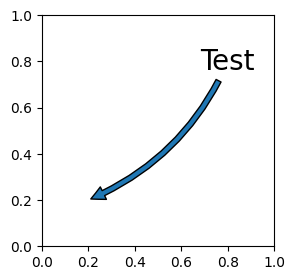

In [10]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.annotate("Test",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"))

As with `~.Axes.text`, a box around the text can be drawn using the *bbox*
argument.



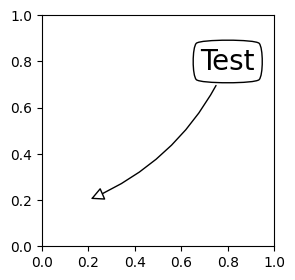

In [11]:
fig, ax = plt.subplots(figsize=(3, 3))

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"))

By default, the starting point is set to the center of the text
extent.  This can be adjusted with ``relpos`` key value. The values
are normalized to the extent of the text. For example, (0, 0) means
lower-left corner and (1, 1) means top-right.



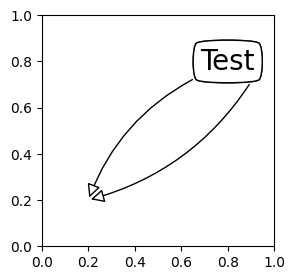

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"))

ann = ax.annotate("Test",
                  xy=(0.2, 0.2), xycoords='data',
                  xytext=(0.8, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(1., 0.),
                                  fc="w"))

### Placing Artist at anchored Axes locations

There are classes of artists that can be placed at an anchored
location in the Axes.  A common example is the legend.  This type
of artist can be created by using the `.OffsetBox` class. A few
predefined classes are available in :mod:`matplotlib.offsetbox` and in
:mod:`mpl_toolkits.axes_grid1.anchored_artists`.



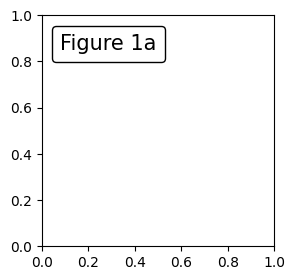

In [13]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize=(3, 3))
at = AnchoredText("Figure 1a",
                  prop=dict(size=15), frameon=True, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

The *loc* keyword has same meaning as in the legend command.

A simple application is when the size of the artist (or collection of
artists) is known in pixel size during the time of creation. For
example, If you want to draw a circle with fixed size of 20 pixel x 20
pixel (radius = 10 pixel), you can utilize
`~mpl_toolkits.axes_grid1.anchored_artists.AnchoredDrawingArea`. The instance
is created with a size of the drawing area (in pixels), and arbitrary artists
can be added to the drawing area. Note that the extents of the artists that are
added to the drawing area are not related to the placement of the drawing
area itself. Only the initial size matters.

The artists that are added to the drawing area should not have a
transform set (it will be overridden) and the dimensions of those
artists are interpreted as a pixel coordinate, i.e., the radius of the
circles in above example are 10 pixels and 5 pixels, respectively.



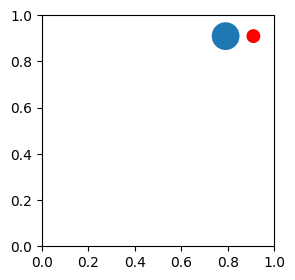

In [14]:
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

fig, ax = plt.subplots(figsize=(3, 3))
ada = AnchoredDrawingArea(40, 20, 0, 0,
                          loc='upper right', pad=0., frameon=False)
p1 = Circle((10, 10), 10)
ada.drawing_area.add_artist(p1)
p2 = Circle((30, 10), 5, fc="r")
ada.drawing_area.add_artist(p2)
ax.add_artist(ada)

Sometimes, you want your artists to scale with the data coordinate (or
coordinates other than canvas pixels). You can use
`~mpl_toolkits.axes_grid1.anchored_artists.AnchoredAuxTransformBox` class.
This is similar to
`~mpl_toolkits.axes_grid1.anchored_artists.AnchoredDrawingArea` except that
the extent of the artist is determined during the drawing time respecting the
specified transform.

The ellipse in the example below will have width and height
corresponding to 0.1 and 0.4 in data coordinates and will be
automatically scaled when the view limits of the Axes change.



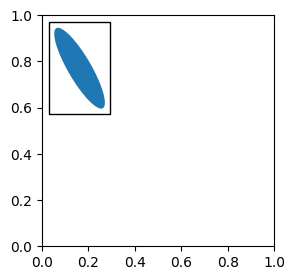

In [15]:
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredAuxTransformBox

fig, ax = plt.subplots(figsize=(3, 3))
box = AnchoredAuxTransformBox(ax.transData, loc='upper left')
el = Ellipse((0, 0), width=0.1, height=0.4, angle=30)  # in data coordinates!
box.drawing_area.add_artist(el)
ax.add_artist(box)

Another method of anchoring an artist relative to a parent Axes or anchor
point is via the *bbox_to_anchor* argument of `.AnchoredOffsetbox`. This
artist can then be automatically positioned relative to another artist using
`.HPacker` and `.VPacker`:



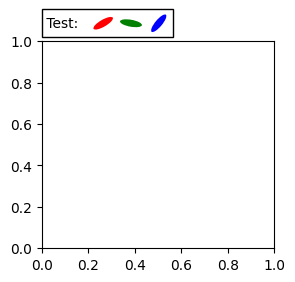

In [16]:
from matplotlib.offsetbox import (AnchoredOffsetbox, DrawingArea, HPacker,
                                  TextArea)

fig, ax = plt.subplots(figsize=(3, 3))

box1 = TextArea(" Test: ", textprops=dict(color="k"))
box2 = DrawingArea(60, 20, 0, 0)

el1 = Ellipse((10, 10), width=16, height=5, angle=30, fc="r")
el2 = Ellipse((30, 10), width=16, height=5, angle=170, fc="g")
el3 = Ellipse((50, 10), width=16, height=5, angle=230, fc="b")
box2.add_artist(el1)
box2.add_artist(el2)
box2.add_artist(el3)

box = HPacker(children=[box1, box2],
              align="center",
              pad=0, sep=5)

anchored_box = AnchoredOffsetbox(loc='lower left',
                                 child=box, pad=0.,
                                 frameon=True,
                                 bbox_to_anchor=(0., 1.02),
                                 bbox_transform=ax.transAxes,
                                 borderpad=0.,)

ax.add_artist(anchored_box)
fig.subplots_adjust(top=0.8)

Note that, unlike in `.Legend`, the ``bbox_transform`` is set to
`.IdentityTransform` by default


## Coordinate systems for annotations

Matplotlib Annotations support several types of coordinate systems. The
examples in `annotations-tutorial` used the ``data`` coordinate system;
Some others more advanced options are:

### `.Transform` instance

Transforms map coordinates into different coordinate systems, usually the
display coordinate system. See `transforms_tutorial` for a detailed
explanation. Here Transform objects are used to identify the coordinate
system of the corresponding points. For example, the ``Axes.transAxes``
transform positions the annotation relative to the Axes coordinates; therefore
using it is identical to setting the coordinate system to "axes fraction":



Text(0.2, 0.2, 'Test')

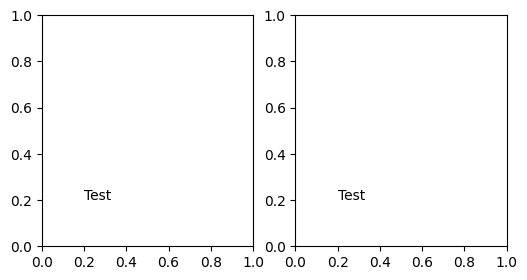

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax1.annotate("Test", xy=(0.2, 0.2), xycoords=ax1.transAxes)
ax2.annotate("Test", xy=(0.2, 0.2), xycoords="axes fraction")

Another commonly used `.Transform` instance is ``Axes.transData``. This
transform  is the coordinate system of the data plotted in the Axes. In this
example, it is used to draw an arrow between related data points in two
Axes. We have passed an empty text because in this case, the annotation
connects data points.



Text(0, 0, '')

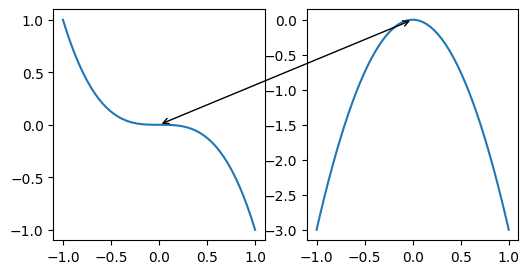

In [18]:
x = np.linspace(-1, 1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax1.plot(x, -x**3)
ax2.plot(x, -3*x**2)
ax2.annotate("",
             xy=(0, 0), xycoords=ax1.transData,
             xytext=(0, 0), textcoords=ax2.transData,
             arrowprops=dict(arrowstyle="<->"))


### `.Artist` instance

The *xy* value (or *xytext*) is interpreted as a fractional coordinate of the
bounding box (bbox) of the artist:



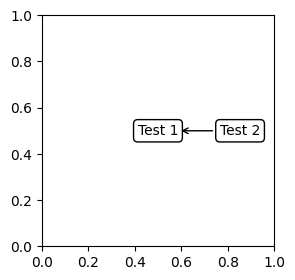

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
an1 = ax.annotate("Test 1",
                  xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax.annotate("Test 2",
                  xy=(1, 0.5), xycoords=an1,  # (1, 0.5) of an1's bbox
                  xytext=(30, 0), textcoords="offset points",
                  va="center", ha="left",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))

Note that you must ensure that the extent of the coordinate artist (*an1* in
this example) is determined before *an2* gets drawn. Usually, this means
that *an2* needs to be drawn after *an1*. The base class for all bounding
boxes is `.BboxBase`

### Callable that returns `.Transform` of `.BboxBase`

A callable object that takes the renderer instance as single argument, and
returns either a `.Transform` or a `.BboxBase`. For example, the return
value of `.Artist.get_window_extent` is a bbox, so this method is identical
to (2) passing in the artist:



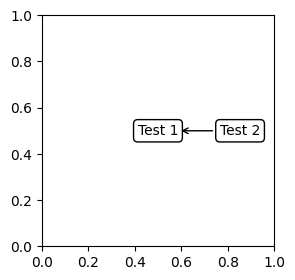

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
an1 = ax.annotate("Test 1",
                  xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax.annotate("Test 2",
                  xy=(1, 0.5), xycoords=an1.get_window_extent,
                  xytext=(30, 0), textcoords="offset points",
                  va="center", ha="left",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))

`.Artist.get_window_extent` is the bounding box of the Axes object and is
therefore identical to setting the coordinate system to axes fraction:



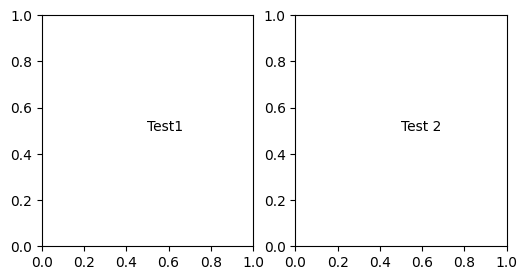

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

an1 = ax1.annotate("Test1", xy=(0.5, 0.5), xycoords="axes fraction")
an2 = ax2.annotate("Test 2", xy=(0.5, 0.5), xycoords=ax2.get_window_extent)

### Blended coordinate specification

A blended pair of coordinate specifications -- the first for the
x-coordinate, and the second is for the y-coordinate. For example, x=0.5 is
in data coordinates, and y=1 is in normalized axes coordinates:



[(0.0, 2.0), (1.0, 2.0)]

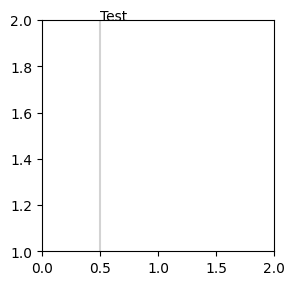

In [22]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.annotate("Test", xy=(0.5, 1), xycoords=("data", "axes fraction"))
ax.axvline(x=.5, color='lightgray')
ax.set(xlim=(0, 2), ylim=(1, 2))

Any of the supported coordinate systems can be used in a blended
specification. For example, the text "Anchored to 1 & 2" is positioned
relative to the two `.Text` Artists:



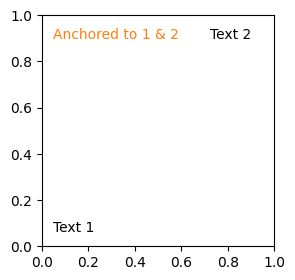

In [23]:
fig, ax = plt.subplots(figsize=(3, 3))

t1 = ax.text(0.05, .05, "Text 1", va='bottom', ha='left')
t2 = ax.text(0.90, .90, "Text 2", ha='right')
t3 = ax.annotate("Anchored to 1 & 2", xy=(0, 0), xycoords=(t1, t2),
                 va='bottom', color='tab:orange',)

### `.text.OffsetFrom`

Sometimes, you want your annotation with some "offset points", not from the
annotated point but from some other point or artist. `.text.OffsetFrom` is
a helper for such cases.



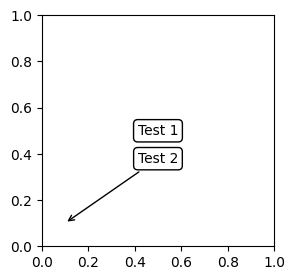

In [24]:
from matplotlib.text import OffsetFrom

fig, ax = plt.subplots(figsize=(3, 3))
an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

offset_from = OffsetFrom(an1, (0.5, 0))
an2 = ax.annotate("Test 2", xy=(0.1, 0.1), xycoords="data",
                  xytext=(0, -10), textcoords=offset_from,
                  # xytext is offset points from "xy=(0.5, 0), xycoords=an1"
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))

## Non-text annotations


### Using ConnectionPatch

`.ConnectionPatch` is like an annotation without text. While `~.Axes.annotate`
is sufficient in most situations, `.ConnectionPatch` is useful when you want
to connect points in different Axes. For example, here we connect the point
*xy* in the data coordinates of ``ax1`` to point *xy* in the data coordinates
of ``ax2``:



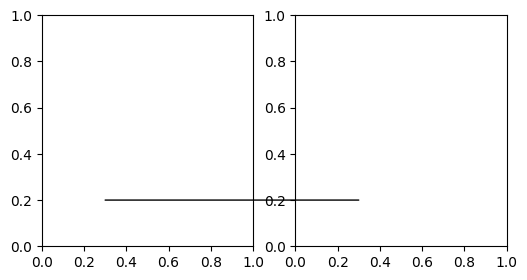

In [25]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
xy = (0.3, 0.2)
con = ConnectionPatch(xyA=xy, coordsA=ax1.transData,
                      xyB=xy, coordsB=ax2.transData)

fig.add_artist(con)

Here, we added the `.ConnectionPatch` to the *figure*
(with `~.Figure.add_artist`) rather than to either Axes. This ensures that
the ConnectionPatch artist is drawn on top of both Axes, and is also necessary
when using `constrained_layout <constrainedlayout_guide>`
for positioning the Axes.

### Zoom effect between Axes

`mpl_toolkits.axes_grid1.inset_locator` defines some patch classes useful for
interconnecting two Axes.

.. figure:: /gallery/subplots_axes_and_figures/images/sphx_glr_axes_zoom_effect_001.png
   :target: /gallery/subplots_axes_and_figures/axes_zoom_effect.html
   :align: center

The code for this figure is at
:doc:`/gallery/subplots_axes_and_figures/axes_zoom_effect` and
familiarity with `transforms_tutorial`
is recommended.

